In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=5

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE)
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
print(68*32)

2176


(32, 256, 256, 3)
[0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 2 1 1 0 0 1 1 0 0 0 0 2 0 0]


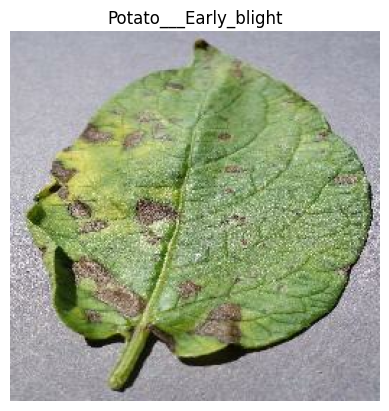

In [7]:
# 3 is RGB classifier
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

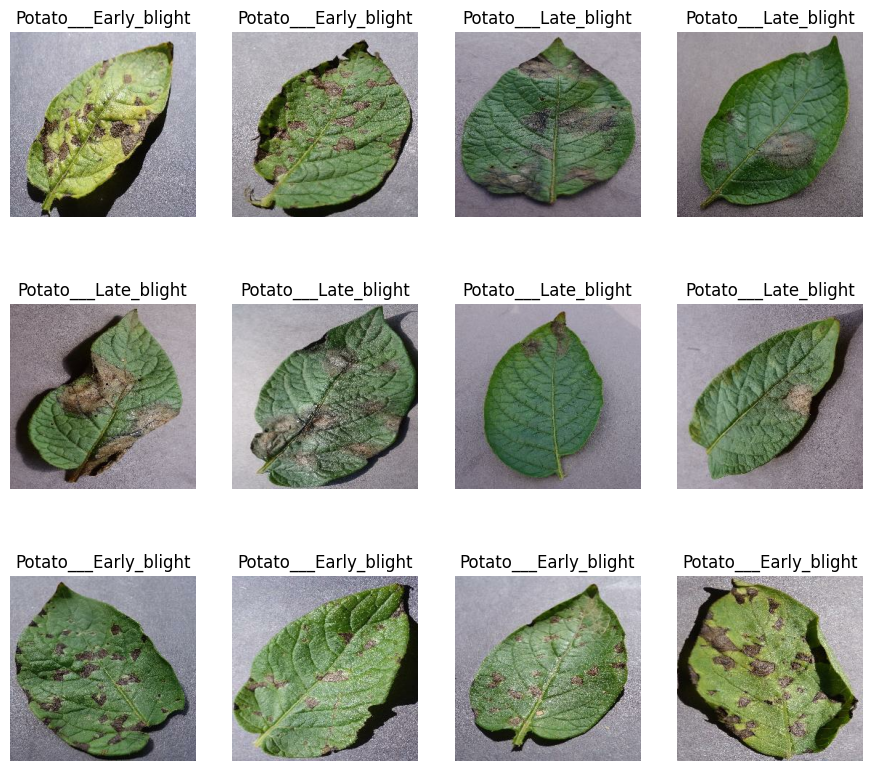

In [8]:
plt.figure(figsize=(11,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

80% ==> training                                                                                                            
20% ==> 10(validation) and 10(testing)

In [9]:
train_size=0.8
int(len(dataset)*train_size)

54

In [10]:
train_ds=dataset.take(54)
test_ds=dataset.skip(54)

In [11]:
len(test_ds)

14

In [12]:
val_size=0.1
int(len(dataset)*val_size)

6

In [13]:
val_ds=test_ds.take(6)

In [14]:
test_ds=test_ds.skip(6)

In [15]:
len(test_ds)

8

In [16]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_ds=dataset.take(int(len(dataset)*train_split))
    test_ds=dataset.skip(len(train_ds))
    val_ds=test_ds.take(int(len(dataset)*val_split))
    test_ds=test_ds.skip(len(val_ds))
    return train_ds,val_ds,test_ds

In [17]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [18]:
print(len(train_ds),len(val_ds),len(test_ds))

54 6 8


In [19]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
# Doing scaling now
for image_batch,label_batch in dataset.take(1):
    print(image_batch.numpy())

[[[[166. 162. 176.]
   [172. 168. 182.]
   [177. 173. 187.]
   ...
   [163. 161. 175.]
   [164. 162. 176.]
   [164. 162. 176.]]

  [[167. 163. 177.]
   [171. 167. 181.]
   [175. 171. 185.]
   ...
   [163. 161. 175.]
   [164. 162. 176.]
   [164. 162. 176.]]

  [[168. 164. 178.]
   [171. 167. 181.]
   [172. 168. 182.]
   ...
   [163. 161. 175.]
   [164. 162. 176.]
   [164. 162. 176.]]

  ...

  [[104.  96. 109.]
   [115. 107. 120.]
   [118. 110. 123.]
   ...
   [112. 106. 120.]
   [129. 123. 137.]
   [119. 113. 127.]]

  [[100.  92. 105.]
   [111. 103. 116.]
   [102.  94. 107.]
   ...
   [ 75.  69.  83.]
   [126. 120. 134.]
   [120. 114. 128.]]

  [[100.  92. 105.]
   [ 85.  77.  90.]
   [107.  99. 112.]
   ...
   [141. 135. 149.]
   [ 93.  87. 101.]
   [110. 104. 118.]]]


 [[[182. 181. 187.]
   [186. 185. 191.]
   [190. 189. 195.]
   ...
   [183. 181. 192.]
   [184. 182. 193.]
   [181. 179. 190.]]

  [[185. 184. 190.]
   [185. 184. 190.]
   [186. 185. 191.]
   ...
   [184. 182. 193.]
 

In [21]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [22]:
# Apply data augmentation
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal and vertical"),
    layers.RandomRotation(0.2)
])

In [23]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

C:\Users\ABHAY\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 2304)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [29]:
history=model.fit(train_ds,
         epochs=EPOCHS,
         batch_size=BATCH_SIZE,
         verbose=1,
         validation_data=val_ds)

Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.9420 - loss: 0.1411 - val_accuracy: 0.9583 - val_loss: 0.1325
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9556 - loss: 0.1228 - val_accuracy: 0.9688 - val_loss: 0.0891
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9690 - loss: 0.0946 - val_accuracy: 0.9740 - val_loss: 0.0641
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.9510 - loss: 0.1140 - val_accuracy: 0.8542 - val_loss: 0.3926
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.9075 - loss: 0.2507 - val_accuracy: 0.9635 - val_loss: 0.0989


In [30]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - accuracy: 0.9627 - loss: 0.1175


In [31]:
scores

[0.11609228700399399, 0.9655172228813171]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [36]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

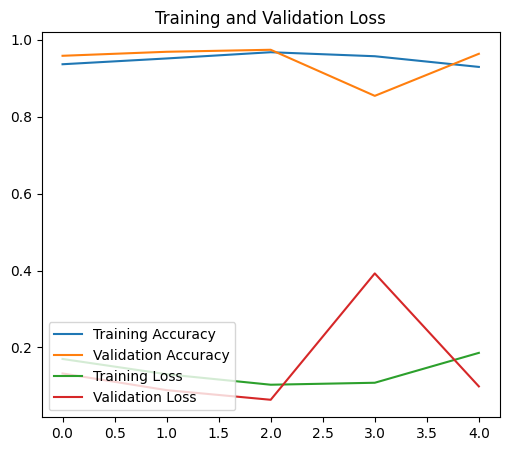

In [40]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower left')
plt.title('Training and Validation Accuracy')

plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

Actual Label : Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Predicted Label : Potato___Late_blight


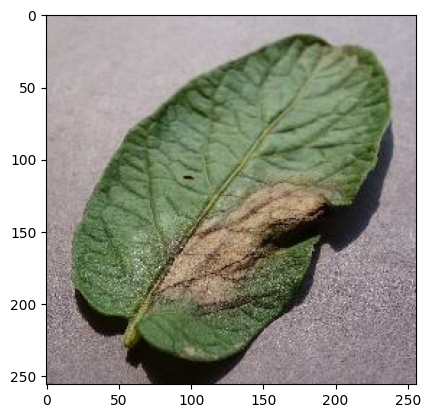

In [52]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    plt.imshow(first_image)
    print("Actual Label :",class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print("Predicted Label :",class_names[np.argmax(batch_prediction[0])])

In [61]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) # create a batch
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


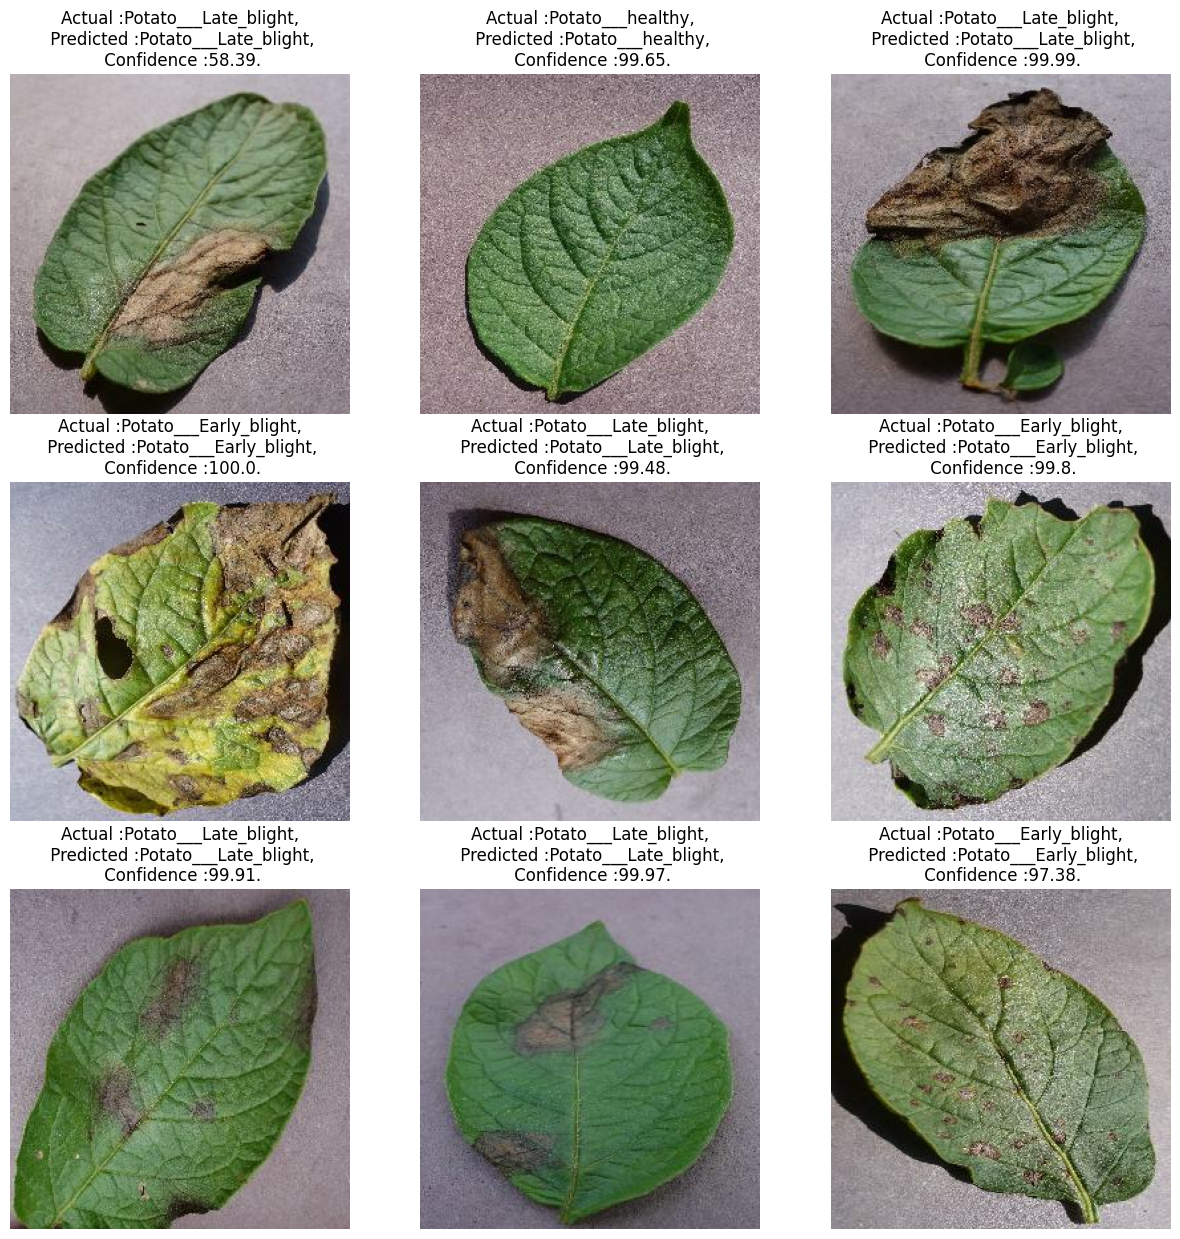

In [62]:
import numpy as np
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual :{actual_class},\n Predicted :{predicted_class},\n Confidence :{confidence}.")
        plt.axis("off")

In [66]:
model.save(f"../models/1.h5")

TypeError: cannot pickle 'module' object

In [67]:
import os
os.listdir("../models")

['1.h5']